In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import time

## Finding, Recording and Plotting the ISS's trajectory
##### This Jupyter Notebook serves for data collection and visualisation. First, we request the current position of the ISS using an API and plot it onto a map. In a second step the route the ISS takes over Earth is respeatedly recorded by a 60 seconds interval. The data is saved to a csv-file and also plotted.

In [2]:
# Reading in json data from API
url = 'http://api.open-notify.org/iss-now.json'
currentposition_df = pd.read_json(url)

In [3]:
# Wranging the data into the needed format
currentposition_df['latitude'] = currentposition_df.loc['latitude', 'iss_position']
currentposition_df['longitude'] = currentposition_df.loc['longitude', 'iss_position']
currentposition_df.reset_index(inplace=True)
currentposition_df = currentposition_df.drop(['index', 'message', 'iss_position'], axis = 1)
currentposition_df.drop_duplicates(subset=['latitude', 'longitude'], inplace=True)
currentposition_df

,timestamp,latitude,longitude
0,2022-04-12 00:38:21,-4.3964,90.9897


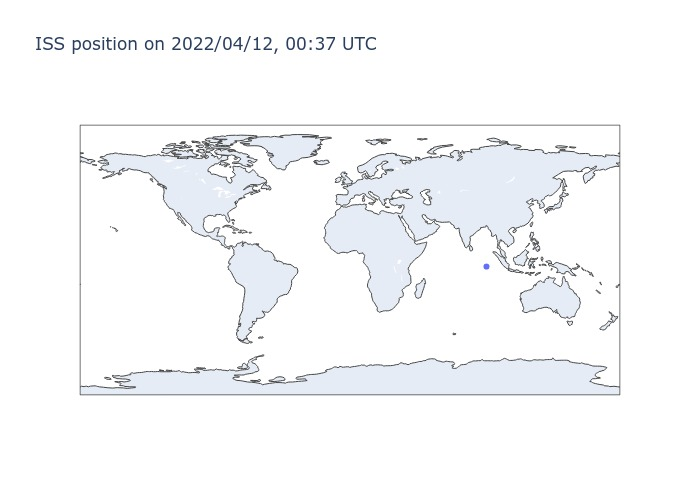

In [4]:
# Plotting the ISS's current position
import plotly.io as pio
pio.renderers.default = 'jpg'

fig = px.scatter_geo(currentposition_df, lat='latitude', lon='longitude', title="ISS position on 2022/04/12, 00:38 UTC")
fig.show()

In [ ]:
# Recording the trajectory using a loop
record_data = True # needs to be manually switched on (True)
if record_data == True:
    starttime=time.time() # starting a timer (new position will be added every 60 seconds)
    space_station_data_df = pd.DataFrame(columns=['timestamp',	'latitude',	'longitude']) # creating an empty df for our observations (though a list would be more efficient)

    while len(space_station_data_df) <= 90: # as long as we haven't recorded 90 instances, do this loop
        url = 'http://api.open-notify.org/iss-now.json'
        furtherposition_df = pd.read_json(url)
        furtherposition_df['latitude'] = furtherposition_df.loc['latitude', 'iss_position']
        furtherposition_df['longitude'] = furtherposition_df.loc['longitude', 'iss_position']
        furtherposition_df.reset_index(inplace=True)
        furtherposition_df = furtherposition_df.drop(['index', 'message', 'iss_position'], axis = 1)
        furtherposition_df.drop_duplicates(subset=['latitude', 'longitude'], inplace=True)

        space_station_data_df = pd.concat([space_station_data_df, furtherposition_df]) # add newest obversation to the previous ones
        print(space_station_data_df.iloc[-1]) # print last line to make the process visible

        time.sleep(60.0 - ((time.time() - starttime) % 60.0)) # adding a 60 seconds break before entering the while loop anew

In [ ]:
# Saving df to file after the process of collecting data has finished
space_station_data_df.to_csv('ISS_locations.csv', index=None)

In [5]:
# Reading recording of historical ISS positions into df and formatting
iss_flight_record_df = pd.read_csv('ISS_locations.csv')
iss_flight_record_df['timestamp'] = pd.to_datetime(iss_flight_record_df['timestamp'])


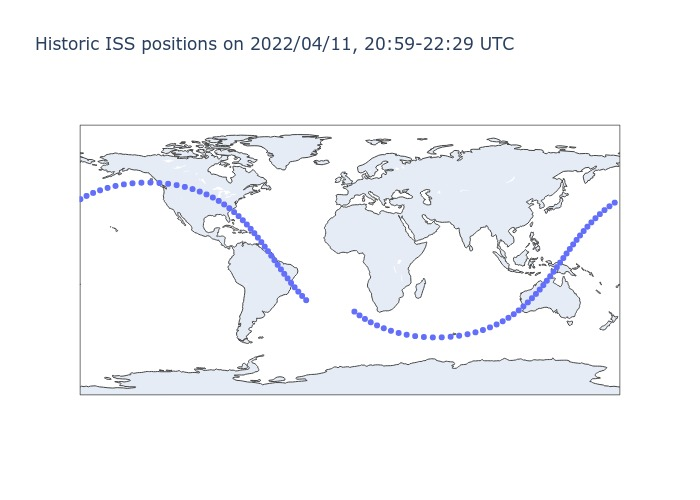

In [6]:
# Plotting historical ISS positions
fig = px.scatter_geo(iss_flight_record_df, lat='latitude', lon='longitude', title="Historic ISS positions on 2022/04/11, 20:59-22:29 UTC")
fig.show()


##### This concludes the data collection and plotting of historical ISS positions. We've got enough data to run predictive models against each other.